<a href="https://colab.research.google.com/github/namoshi/mathAI/blob/master/func_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization

関数
\begin{align*}
  f(x) = (x-2)^2(x+3)(x+1) = x^4 + 7x^3 + 5x^2 - 17 x + 3
\end{align*}
の最小値を求める問題を考える．

まずは，この関数のグラフを描いてみます．
グラフからもわかるように，この関数は，

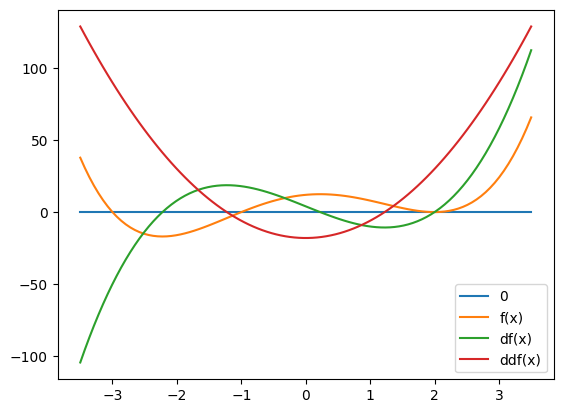

In [28]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
  return np.power(x, 4) - 9.0 * np.power(x, 2) + 4.0 * x + 12.0

def df(x):
  return 4.0 * np.power(x, 3) - 18.0 * x + 4.0

def ddf(x):
  return 12.0 * np.power(x, 2) - 18.0

x = np.linspace(-3.5, 3.5, 100)

zero = np.zeros(len(x))
y = f(x)
dy = df(x)
ddy = ddf(x)

plt.plot(x, zero, label='0')

plt.plot(x, y, label='f(x)')

plt.plot(x, dy, label='df(x)')

plt.plot(x, ddy, label='ddf(x)')

plt.legend()

plt.show()

このグラフから関数$f(x)$は，-2付近に最小値(Global Minima)を持ち，2付近にも局所的な最小値(Local Minima)があることがわかる．

計算してみると，$x = -1 - \sqrt{\frac{3}{2}}$で最小値$-\frac{9}{4}-6\sqrt{6}$を持つことがわかる．
これが，$f(x)$の微分$df$のグラフ（緑の線）が$x = -1 - \sqrt{\frac{3}{2}}$で0となり，それより左側では負の値をとり，右側では正の値をとっている．つまり，$x$が$x = -1 - \sqrt{\frac{3}{2}}$より小さい領域では値が減少し，それより大きい領域では，値が増加することがわかる．

$x=2.0$で同様の傾向にあるが，ここでの関数の値は，0であり，最小値よりも大きな値となっている．

一方，$x = -1 + \sqrt{\frac{3}{2}}$でも微分が0となるが，逆の傾向となり局所的な最大値となっている．

最小値となっているか最大値となっているかは，2階微分（赤の線）の値を見ればわかる．$x = -1 - \sqrt{\frac{3}{2}}$，および，$x=2.0$がでは，2階微分の値は正となっており，微分が負から正に変化し，逆に，$x = -1 + \sqrt{\frac{3}{2}}$では，2階微分が負となっており，微分が制から負になっている．

In [ ]:
print(df(-1.0+np.sqrt(3.0/2.0)))
print(df(-1.0-np.sqrt(3.0/2.0)))
print(df(2.0))

1.7763568394002505e-15
7.105427357601002e-15
0.0


# Stochastic Gradient Decent



epoch 10, x: -2.224745


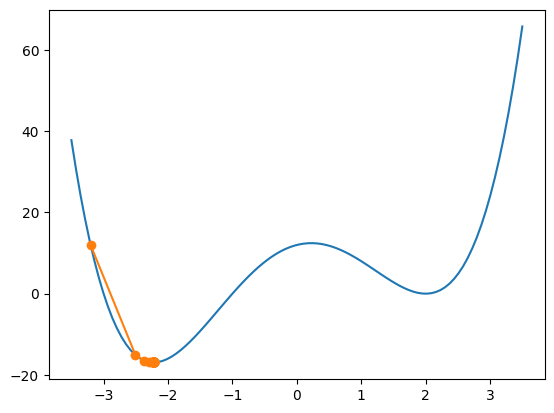

In [32]:
import torch

def gd(initx, eta, f_grad):
    x = initx
    results = [x]
    for i in range(50):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results


def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    plt.plot(x, y, label='f(x)')
    xxx = np.zeros(len(results))
    yyy = np.zeros(len(results))
    for i, xx in enumerate(results):
      xxx[i] = xx
      yyy[i] = f(xx)
#    print(xxx)
#    print(yyy)
    plt.plot(xxx, yyy, '-o')
    plt.show()

results = gd(-3.2, 0.01, df)
#print(results)
show_trace(results, f)

epoch 10, x: 2.000000


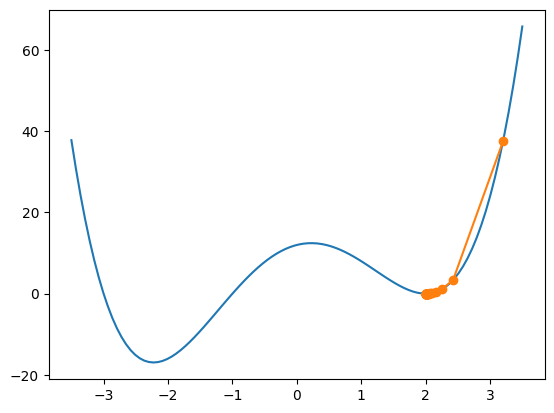

In [33]:
results = gd(3.2, 0.01, df)
#print(results)
show_trace(results, f)

epoch 10, x: -2.224737


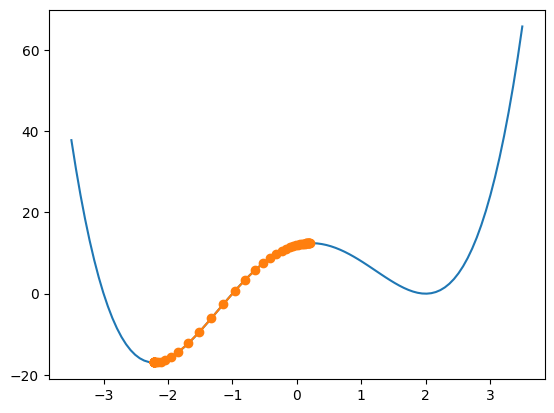

In [34]:
results = gd(0.2, 0.01, df)
#print(results)
show_trace(results, f)

epoch 10, x: 1.999999


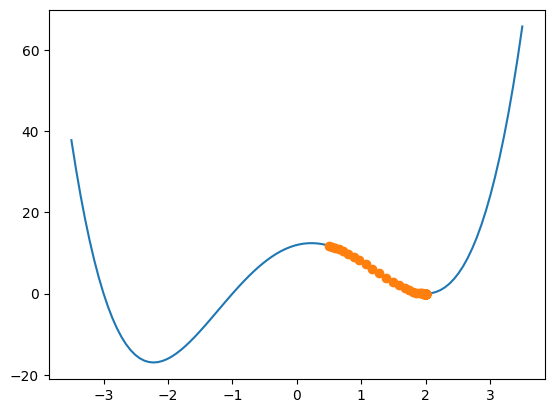

In [35]:
results = gd(0.5, 0.01, df)
#print(results)
show_trace(results, f)